In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
d1 = pd.read_csv('C:\\Users\\Sparta Laptop Store\\Documents\\NF\\categories.csv')
d2 = pd.read_csv('C:\\Users\\Sparta Laptop Store\\Documents\\NF\\customers.csv', encoding="ISO-8859-1")
d3 = pd.read_csv('C:\\Users\\Sparta Laptop Store\\Documents\\NF\\employees.csv')
d4 = pd.read_csv('C:\\Users\\Sparta Laptop Store\\Documents\\NF\\order_details.csv')
d5 = pd.read_csv('C:\\Users\\Sparta Laptop Store\\Documents\\NF\\orders.csv')
d6 = pd.read_csv('C:\\Users\\Sparta Laptop Store\\Documents\\NF\\products.csv', encoding="ISO-8859-1")
d7 = pd.read_csv('C:\\Users\\Sparta Laptop Store\\Documents\\NF\\shippers.csv')


In [5]:
d1.columns

Index(['categoryID', 'categoryName', 'description'], dtype='object')

In [6]:
d2.columns


Index(['customerID', 'companyName', 'contactName', 'contactTitle', 'city',
       'country'],
      dtype='object')

In [7]:
d3.columns


Index(['employeeID', 'employeeName', 'title', 'city', 'country', 'reportsTo'], dtype='object')

In [8]:

d4.columns


Index(['orderID', 'productID', 'unitPrice', 'quantity', 'discount'], dtype='object')

In [9]:
d5.columns


Index(['orderID', 'customerID', 'employeeID', 'orderDate', 'requiredDate',
       'shippedDate', 'shipperID', 'freight'],
      dtype='object')

In [10]:

d6.columns


Index(['productID', 'productName', 'quantityPerUnit', 'unitPrice',
       'discontinued', 'categoryID'],
      dtype='object')

In [12]:

d7.columns

Index(['shipperID', 'companyName'], dtype='object')

# QUESTIONS

In [13]:
# 1. What are the unique category names in d1?
unique_categories = d1['categoryName'].unique()
print(unique_categories)

['Beverages' 'Condiments' 'Confections' 'Dairy Products'
 'Grains & Cereals' 'Meat & Poultry' 'Produce' 'Seafood']


In [14]:
# 2. How many categories are there in d1?
num_categories = len(unique_categories)
print(num_categories)


8


In [15]:
# 3. What is the distribution of category names in d1?
category_counts = d1['categoryName'].value_counts()
print(category_counts)

Beverages           1
Condiments          1
Confections         1
Dairy Products      1
Grains & Cereals    1
Meat & Poultry      1
Produce             1
Seafood             1
Name: categoryName, dtype: int64


In [16]:
# 4. Is there any missing data in the 'description' column?
missing_description = d1['description'].isnull().sum()
print(missing_description)

0


In [17]:
# 5. How many unique customers are there in d2 and d5?
unique_customers_d2 = d2['customerID'].nunique()
unique_customers_d5 = d5['customerID'].nunique()
print("Unique customers in d2 are " + str(unique_customers_d2))
print("Unique customers in d5 are " + str(unique_customers_d5))



Unique customers in d2 are 91
Unique customers in d5 are 89


In [18]:
# 6. Which city appears most frequently in d3?
most_common_city = d3['city'].mode()[0]
print(most_common_city)


New York


In [19]:
# 7. What is the distribution of countries in d3?
country_counts = d3['country'].value_counts()
print(country_counts)

USA    5
UK     4
Name: country, dtype: int64


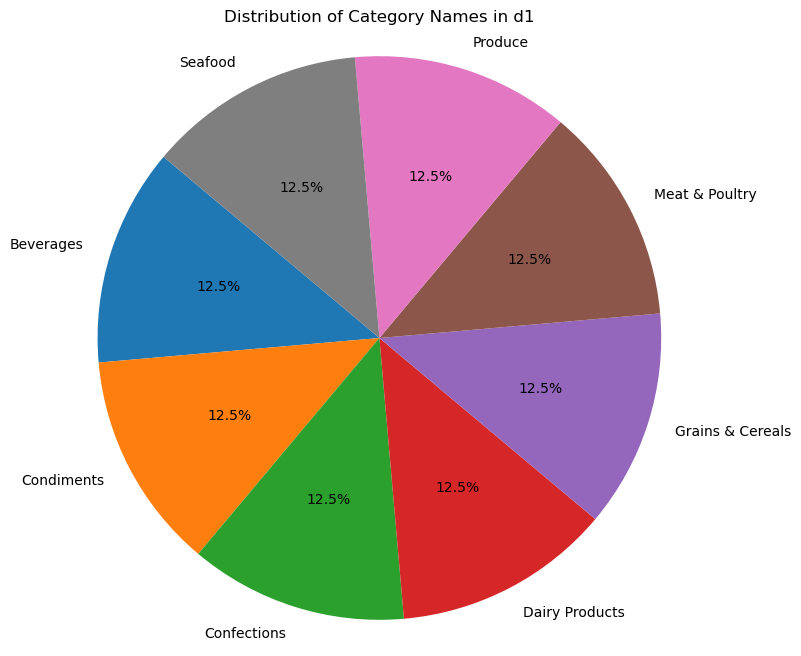

In [20]:
# 8. Can you visualize the distribution of category names using a bar chart?
# Count the frequency of each category name
category_counts = d1['categoryName'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Category Names in d1')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [21]:
# 9. What is the average length of category descriptions?
avg_description_length = d1['description'].str.len().mean()
print(avg_description_length)

29.125


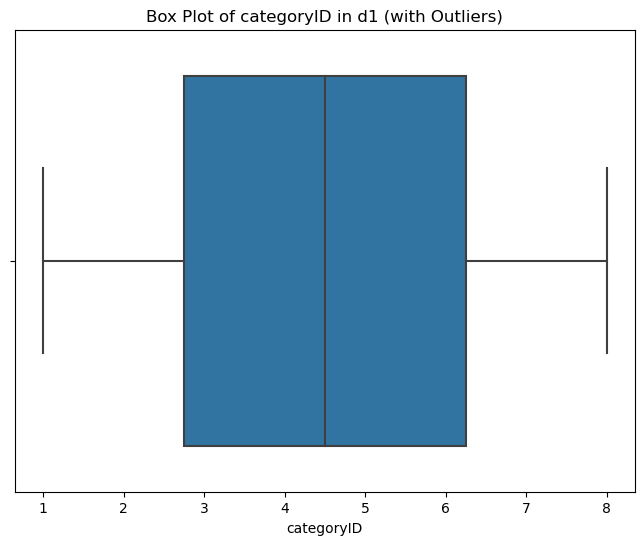

Outliers in 'categoryID' column:
Empty DataFrame
Columns: [categoryID, categoryName, description]
Index: []


In [22]:

# 10. Are there any outliers in the 'categoryID' column?
# Calculate the lower and upper bounds for outliers
outliers = np.percentile(d1['categoryID'], [25, 75])
iqr = outliers[1] - outliers[0]
lower_bound = outliers[0] - 1.5 * iqr
upper_bound = outliers[1] + 1.5 * iqr

# Identify outliers in the 'categoryID' column
outliers = d1[(d1['categoryID'] < lower_bound) | (d1['categoryID'] > upper_bound)]

# Create a box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=d1, x='categoryID')
plt.title('Box Plot of categoryID in d1 (with Outliers)')
plt.xlabel('categoryID')
plt.show()

# Print the details of identified outliers
print("Outliers in 'categoryID' column:")
print(outliers)

In [23]:
# 11. How many unique contact titles are there in d2?
unique_contact_titles = d2['contactTitle'].nunique()
print(unique_contact_titles)

12


In [24]:
# 12. What is the distribution of cities in d2?
city_counts = d2['city'].value_counts()
print(city_counts)


London            6
Mexico City       5
Sao Paulo         4
Buenos Aires      3
Rio de Janeiro    3
                 ..
Toulouse          1
Vancouver         1
Frankfurt a.M.    1
San Francisco     1
Warszawa          1
Name: city, Length: 69, dtype: int64


In [25]:
# 13. Are there any customers from a specific country that stand out?
country_with_most_customers = d2['country'].mode()[0]
print(country_with_most_customers)

USA


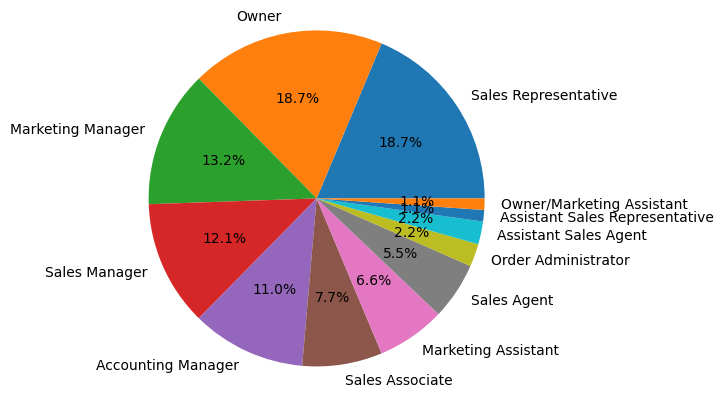

In [26]:
# 14. Can you visualize the distribution of contact titles using a pie chart?
contact_title_counts = d2['contactTitle'].value_counts()
plt.pie(contact_title_counts, labels=contact_title_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [27]:
# 15. How many customers are located in each city?
customers_per_city = d2['city'].value_counts()
print(customers_per_city)

London            6
Mexico City       5
Sao Paulo         4
Buenos Aires      3
Rio de Janeiro    3
                 ..
Toulouse          1
Vancouver         1
Frankfurt a.M.    1
San Francisco     1
Warszawa          1
Name: city, Length: 69, dtype: int64


In [28]:
# 16. Are there any missing values in the 'contactName' column?
missing_contact_name = d2['contactName'].isnull().sum()
print(missing_contact_name)

0


In [29]:
# 17. How many unique countries are represented in d2?
unique_countries = d2['country'].nunique()
print(unique_countries)

21


In [30]:
# 18. Who is the employee with the highest employeeID?
highest_employee_id = d3['employeeName'][d3['employeeID'].idxmax()]
print(highest_employee_id)

Anne Dodsworth


In [31]:
# 19. What is the distribution of employee titles?
employee_title_counts = d3['title'].value_counts()
print(employee_title_counts)

Sales Representative    6
Sales Manager           2
Vice President Sales    1
Name: title, dtype: int64


In [32]:
# 20. Are there any employees who don't report to anyone (missing 'reportsTo')?
employees_without_manager = d3[d3['reportsTo'].isnull()]
print(employees_without_manager)

   employeeID   employeeName                 title      city country  \
1           2  Andrew Fuller  Vice President Sales  New York     USA   

   reportsTo  
1        NaN  


In [33]:
# 21. How many unique cities are employees located in?
unique_cities = d3['city'].nunique()
print(unique_cities)

2


In [34]:
# 22. How many employees are there per country?
employees_per_country = d3['country'].value_counts()
print(employees_per_country)

USA    5
UK     4
Name: country, dtype: int64


In [35]:
# 23. What is the distribution of order quantities?
order_quantity_counts = d4['quantity'].value_counts()
print(order_quantity_counts)

20     252
30     194
10     181
15     169
40     113
12      92
6       87
25      80
50      75
35      71
5       67
24      58
60      58
4       55
2       52
8       50
21      50
18      47
3       46
14      36
16      35
9       30
28      29
70      28
7       23
36      21
42      19
1       17
80      16
45      14
100     10
55       9
120      8
65       8
49       7
48       5
32       5
44       4
90       4
110      3
77       3
13       3
56       3
39       2
84       2
11       2
27       2
33       2
130      2
54       1
52       1
91       1
66       1
63       1
22       1
Name: quantity, dtype: int64


In [36]:
# 24. What is the average discount percentage applied to orders?
average_discount_percentage = (d4['discount'].sum() / d4['orderID'].nunique()) * 100
print(average_discount_percentage)


14.583132530120482


In [37]:
# 25. How many orders were placed per employee?
orders_per_employee = d5['employeeID'].value_counts()
print(orders_per_employee)


4    156
3    127
1    123
8    104
2     96
7     72
6     67
9     43
5     42
Name: employeeID, dtype: int64


In [38]:
#  26. What is the average shipping time for orders?
d5['orderDate'] = pd.to_datetime(d5['orderDate'])
d5['shippedDate'] = pd.to_datetime(d5['shippedDate'])
d5['shipping_time'] = (d5['shippedDate'] - d5['orderDate']).dt.days
average_shipping_time = d5['shipping_time'].mean()
print(average_shipping_time)

8.491965389369591


In [39]:
#27"What is the average length of category names in terms of characters
average_name_length = d1['categoryName'].apply(len).mean()
print(round(average_name_length, 2))  












11.0


In [40]:
#28Which category has the most words in its description
d1['description_word_count'] = d1['description'].apply(lambda x: len(x.split()))
category_with_most_words = d1[d1['description_word_count'] == d1['description_word_count'].max()]['categoryName'].values[0]
print(category_with_most_words)  


Condiments


In [41]:
#29What is the most common title among employees
most_common_title = d3['title'].mode().values[0]
print(most_common_title)  # Output: <Most Common Title Among Employees>




Sales Representative


In [42]:
#30Which product has the highest total sales in d4

d4['total_sales'] = d4['unitPrice'] * d4['quantity'] * (1 - d4['discount'])
product_with_highest_sales = d4[d4['total_sales'] == d4['total_sales'].max()]['productID'].values[0]
print(product_with_highest_sales) 


38


In [43]:

#31What is the total quantity of products ordered

total_quantity_ordered = d4['quantity'].sum()
print(total_quantity_ordered)  # Output: <Total Quantity Ordered>


51317


In [44]:
#32Which product has the highest total sales in d4
d4['total_sales'] = d4['unitPrice'] * d4['quantity'] * (1 - d4['discount'])
product_with_highest_sales = d4[d4['total_sales'] == d4['total_sales'].max()]['productID'].values[0]
print(product_with_highest_sales)  


38


In [45]:
#33 What is the total quantity per unit for all products
total_quantity_per_unit = d6['quantityPerUnit'].sum()
print(total_quantity_per_unit)  # Output: <Total Quantity Per Unit for All Products>


10 boxes x 20 bags24 - 12 oz bottles12 - 550 ml bottles48 - 6 oz jars36 boxes12 - 8 oz jars12 - 1 lb pkgs.12 - 12 oz jars18 - 500 g pkgs.12 - 200 ml jars1 kg pkg.10 - 500 g pkgs.2 kg box40 - 100 g pkgs.24 - 250 ml bottles32 - 500 g boxes20 - 1 kg tins16 kg pkg.10 boxes x 12 pieces30 gift boxes24 pkgs. x 4 pieces24 - 500 g pkgs.12 - 250 g pkgs.12 - 355 ml cans20 - 450 g glasses100 - 250 g bags100 - 100 g pieces25 - 825 g cans50 bags x 30 sausgs.10 - 200 g glasses12 - 100 g pkgs24 - 200 g pkgs.500 g24 - 12 oz bottles24 - 12 oz bottles24 - 250 g  jars12 - 500 g pkgs.12 - 75 cl bottles750 cc per bottle24 - 4 oz tins12 - 12 oz cans32 - 1 kg pkgs.16 - 500 g tins20 - 2 kg bags1k pkg.4 - 450 g glasses10 - 4 oz boxes10 pkgs.24 - 50 g pkgs.12 - 100 g bars50 - 300 g pkgs.16 - 2 kg boxes48 pieces16 pies24 boxes x 2 pies24 - 250 g pkgs.24 - 250 g pkgs.24 pieces5 kg pkg.15 - 300 g rounds24 - 500 ml bottles48 pies15 - 625 g jars20 bags x 4 pieces32 - 8 oz bottles24 - 8 oz jars24 - 12 oz bottles10 box

In [46]:
#34 How many unique product names are there in the dataset in d6.
unique_product_names = len(d6['productName'].unique())
print(unique_product_names)  # Output: <Number of Unique Product Names>


77


In [47]:
#35 How many products are discontinued in d6
discontinued_products = len(d6[d6['discontinued'] == 1])
print(discontinued_products)  # Output: <Number of Discontinued Products>


8


In [48]:

#36Which employee has the highest employee ID in d3
highest_employee_id_employee = d3[d3['employeeID'] == d3['employeeID'].max()]['employeeName'].values[0]
print(highest_employee_id_employee)  # Output: <Employee with the Highest Employee ID>


Anne Dodsworth


In [49]:
#37What are the names of all the shipping companies in d7
shipping_companies = d7['companyName'].unique()
print(shipping_companies)  # Output: <List of Unique Shipping Company Names>


['Speedy Express' 'United Package' 'Federal Shipping']


In [50]:
#38Which shipping company has the fewest shipments in d7
fewest_shipments_company = d7.groupby('companyName')['shipperID'].count().idxmin()
print(fewest_shipments_company)  # Output: <Shipping Company with Fewest Shipments>


Federal Shipping


In [51]:
#39 How many unique categories are there in the dataset?
unique_categories = d6['categoryID'].nunique()
print("Number of unique categories:", unique_categories)

Number of unique categories: 8


In [52]:
#40 What is the average unit price of the products?
average_unit_price = d6['unitPrice'].mean()
print("Average unit price:", average_unit_price)


Average unit price: 28.866363636363637


In [54]:
#41 Which product has the highest unit price?
product_with_highest_price = d6[d6['unitPrice'] == d6['unitPrice'].max()]
print("Product with the highest unit price:")
print(product_with_highest_price[['productID', 'productName', 'unitPrice']])

Product with the highest unit price:
    productID    productName  unitPrice
37         38  Côte de Blaye      263.5


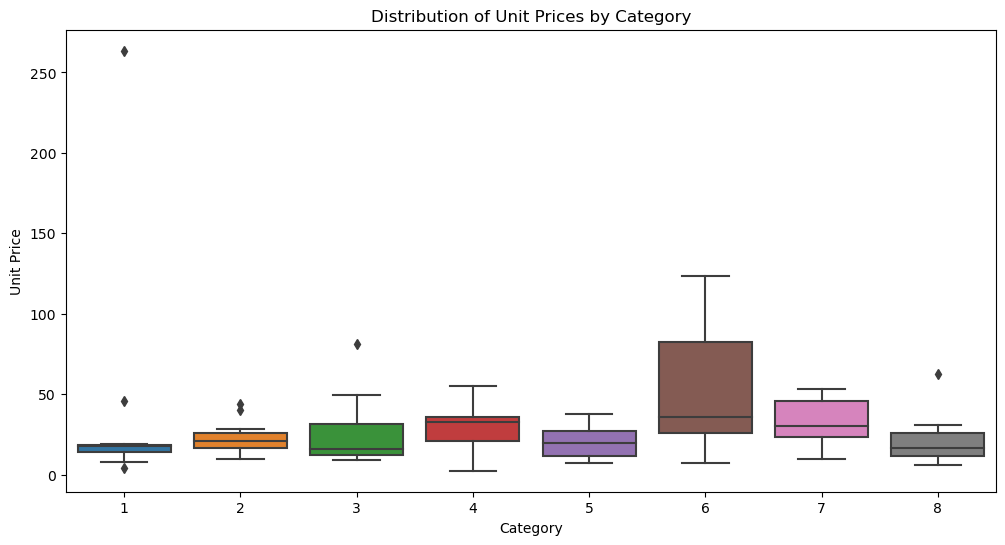

In [59]:
#42 What is the distribution of unit prices for products in each category?
plt.figure(figsize=(12, 6))
sns.boxplot(x='categoryID', y='unitPrice', data=d6)
plt.title('Distribution of Unit Prices by Category')
plt.xlabel('Category')
plt.ylabel('Unit Price')
plt.show()

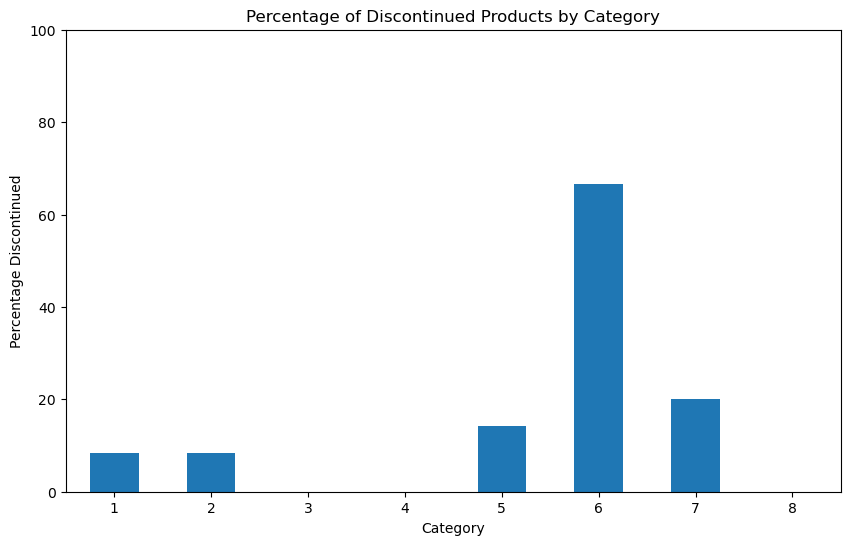

In [61]:
#43 What is the percentage of discontinued products in each category?
discontinued_percentage = d6.groupby('categoryID')['discontinued'].mean() * 100
plt.figure(figsize=(10, 6))
discontinued_percentage.plot(kind='bar')
plt.title('Percentage of Discontinued Products by Category')
plt.xlabel('Category')
plt.ylabel('Percentage Discontinued')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.show()

In [64]:
#44 Which city has the highest number of customers?
city_with_most_customers = d2['city'].value_counts().idxmax()
print("City with the most customers:", city_with_most_customers)


City with the most customers: London


In [65]:
#45 What is the most common contact title among the customers?
common_contact_title = d2['contactTitle'].mode()[0]
print("Most common contact title:", common_contact_title)

Most common contact title: Owner


In [66]:
#46 How many customers are based in Mexico?
customers_in_mexico = d2[d2['country'] == 'Mexico'].shape[0]
print("Number of customers based in Mexico:", customers_in_mexico)

Number of customers based in Mexico: 5


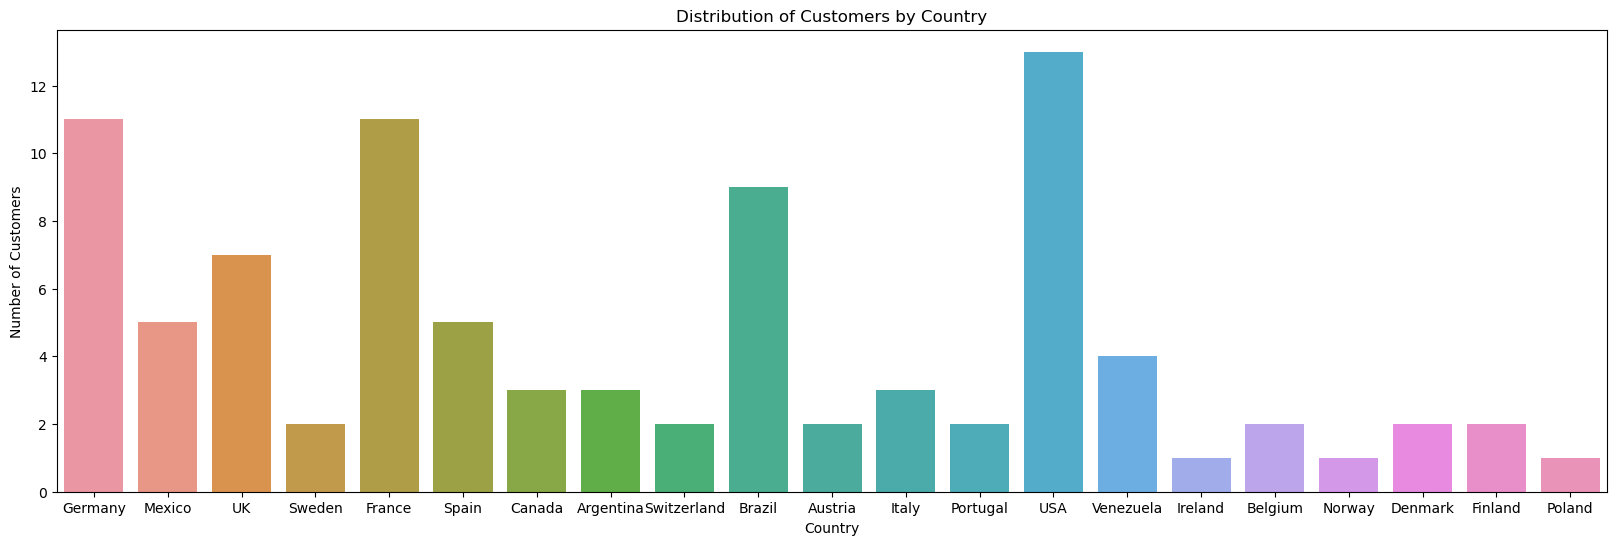

In [71]:
#47 Create a bar chart to visualize the distribution of customers by country.
plt.figure(figsize=(20, 6))
sns.countplot(data=d2, x='country')
plt.title('Distribution of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()






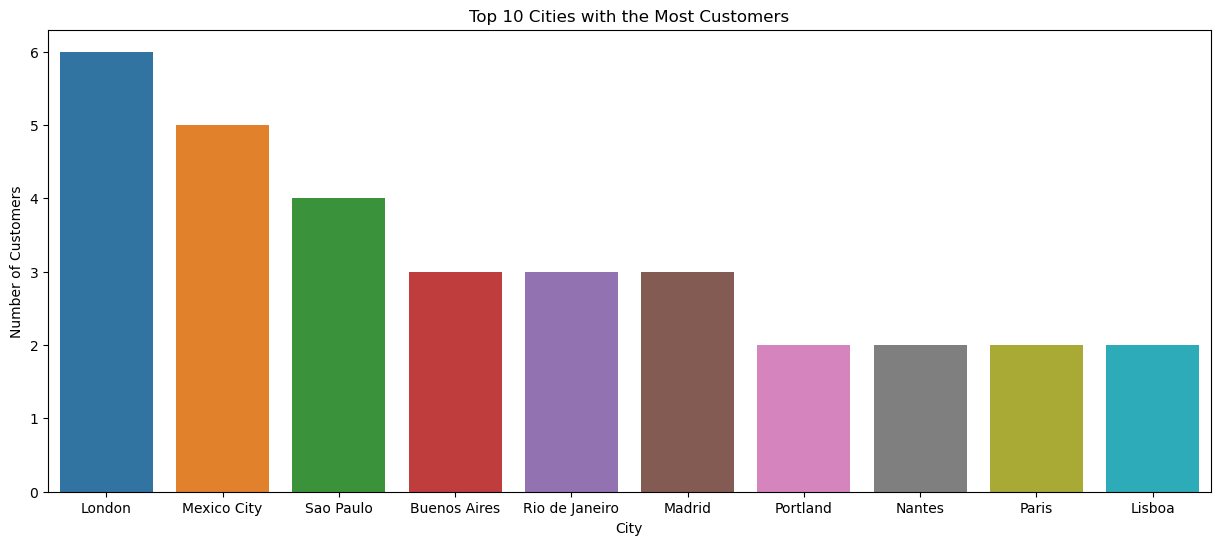

In [74]:
#48 Which are Top 10 cities with the highest number of customers?
top_cities = d2['city'].value_counts().nlargest(10)
plt.figure(figsize=(15, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Cities with the Most Customers')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()

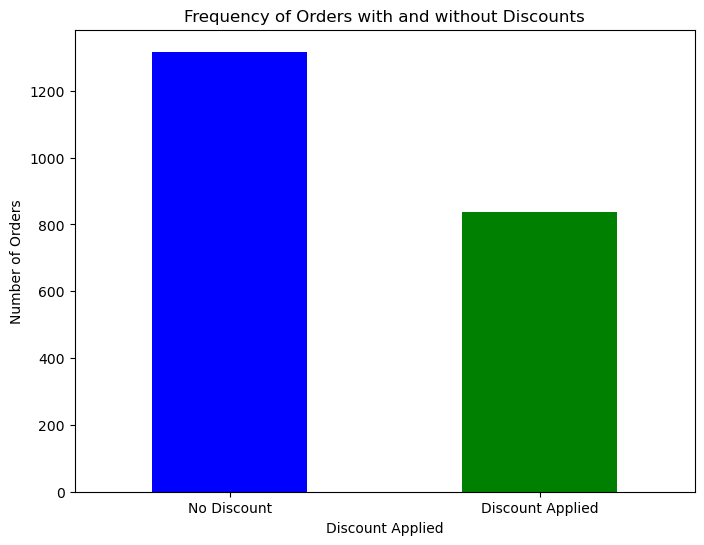

In [78]:
#49 How often are discounts applied to orders, and what is the distribution of orders with and without discounts?
plt.figure(figsize=(8, 6))
d4['discount_applied'] = d4['discount'] > 0
discount_counts = d4['discount_applied'].value_counts()
discount_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Frequency of Orders with and without Discounts')
plt.xlabel('Discount Applied')
plt.ylabel('Number of Orders')
plt.xticks([0, 1], ['No Discount', 'Discount Applied'], rotation=0)
plt.show()

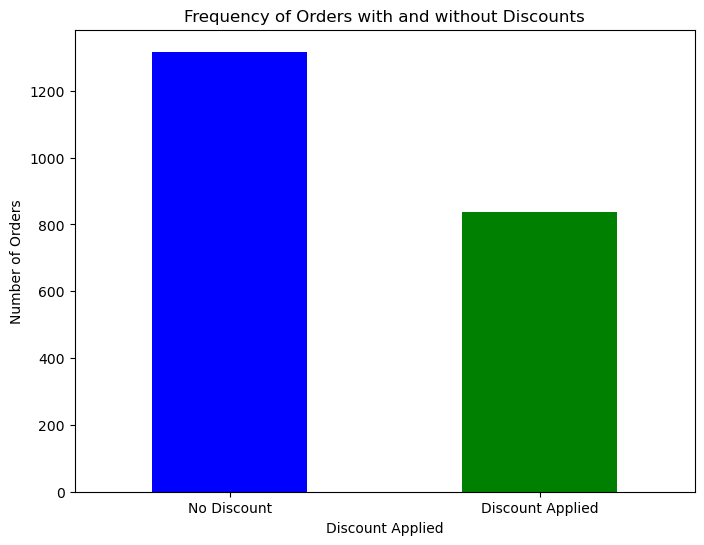

In [77]:
plt.figure(figsize=(8, 6))
d4['discount_applied'] = d4['discount'] > 0
discount_counts = d4['discount_applied'].value_counts()
discount_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('Frequency of Orders with and without Discounts')
plt.xlabel('Discount Applied')
plt.ylabel('Number of Orders')
plt.xticks([0, 1], ['No Discount', 'Discount Applied'], rotation=0)
plt.show()

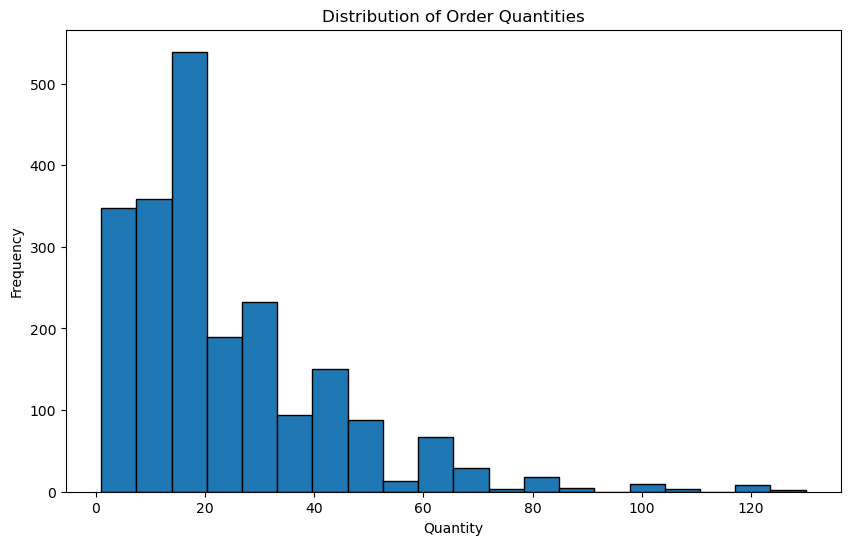

In [79]:
#50 What is the typical order quantity?
plt.figure(figsize=(10, 6))
plt.hist(d4['quantity'], bins=20, edgecolor='k')
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()
